In [81]:
import numpy as np
from genreclassification.utils import get_project_root
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import History, EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import dataframe_image as dfi
pd.set_option("display.max_columns", None)

# retesting the CNN
---
* this notebook was to rectify an issue with the test set
* workings have now been integrated to both vgg16 model notebooks
---

In [82]:
genres = ["blues", "classical", "country", "disco",	"hiphop", "jazz", "metal", "pop", "reggae", "rock"]

In [83]:
test_path = get_project_root()/"data/images_split/test"

In [84]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(244,244), classes=genres, batch_size=16, shuffle=False)

Found 200 images belonging to 10 classes.


### load model:

In [85]:
vgg_model = load_model(
    get_project_root() / "models/vgg/vgg"
)

In [86]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

## performance on test set

In [87]:
pred = vgg_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [88]:
np.argmax(pred, axis=1)

array([8, 0, 0, 0, 0, 0, 9, 5, 6, 0, 0, 8, 6, 2, 8, 0, 0, 0, 0, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 9,
       2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 9, 2, 9, 9, 2, 2, 3, 3, 9, 3, 3, 3,
       3, 3, 4, 3, 8, 3, 3, 9, 4, 0, 3, 3, 0, 3, 7, 4, 4, 6, 4, 4, 4, 4,
       5, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 5, 0, 5, 5, 5, 5, 1, 0, 5, 5, 5,
       1, 5, 2, 1, 5, 2, 1, 5, 5, 5, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 2, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7,
       4, 7, 7, 7, 9, 7, 8, 8, 8, 8, 9, 8, 8, 8, 7, 8, 4, 6, 7, 7, 7, 8,
       7, 4, 3, 3, 9, 6, 6, 2, 6, 6, 2, 7, 2, 0, 0, 6, 1, 9, 3, 2, 6, 6,
       9, 9])

In [89]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9], dtype=int32)

In [90]:
score = (loss, Accuracy) = vgg_model.evaluate(x=test_batches, steps= len(test_batches), verbose=0)
print(f"tf accuracy: {score[1]}")

tf accuracy: 0.6650000214576721


In [91]:
pred_class = np.argmax(pred, axis=1)
# pred_class = pd.Series(pred_class)

In [92]:
cm = confusion_matrix(
    test_batches.classes,
    pred_class
)
cm

array([[11,  0,  1,  0,  0,  2,  2,  0,  3,  1],
       [ 0, 19,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  1,  0,  0,  0,  4],
       [ 2,  0,  0, 13,  2,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 15,  2,  1,  1,  1,  0],
       [ 2,  4,  2,  0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  1],
       [ 0,  0,  1,  1,  1,  0,  0, 16,  0,  1],
       [ 0,  0,  0,  2,  2,  0,  1,  5,  9,  1],
       [ 2,  1,  4,  1,  0,  0,  7,  1,  0,  4]])

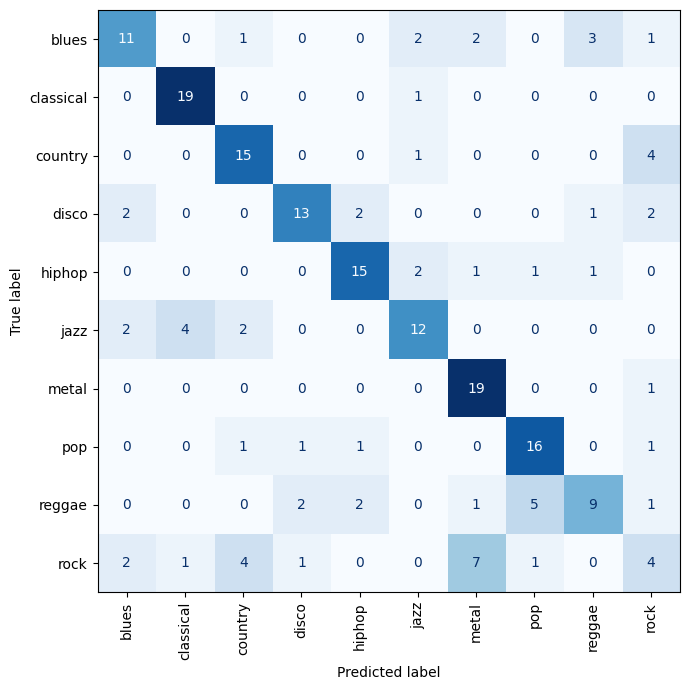

In [93]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ConfusionMatrixDisplay(
    cm,
    display_labels=genres
).plot(
    xticks_rotation=90,
    cmap="Blues",
    colorbar=False,
    ax=ax
)
fig.tight_layout()

In [31]:
fig.savefig(
    get_project_root() / "models/vgg/vgg_cm2.svg"
)
fig.savefig(
    get_project_root() / "models/vgg/vgg_cm2.png"
)

In [114]:
def average_metrics(y_test, y_pred):
    scorers = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_micro": f1_score(y_test, y_pred, average="micro"),
        "f1_macro": f1_score(y_test, y_pred, average="macro"),
        "recall_micro": recall_score(y_test, y_pred, average="micro"),
        "recall_macro": recall_score(y_test, y_pred, average="macro"),
        "precision_micro": precision_score(y_test, y_pred, average="micro"),
        "precision_macro": precision_score(y_test, y_pred, average="macro")
    }
    df = pd.DataFrame(index=scorers.keys(), columns=["metric score"])
    for scorer in scorers.keys():
        df.at[scorer, "metric score"] = scorers[scorer]
    df=df.transpose()
    return df

def class_metrics(y_test, y_pred, class_labels):
    df = pd.DataFrame(index=list(class_labels))

    for scorer in [
        ("recall", recall_score),
        ("precision", precision_score),
        ("f1", f1_score)
    ]:
        metric_score = scorer[1](
            y_test,
            y_pred,
            average=None,
            # labels=list(class_labels)
        )
        df[scorer[0]] = metric_score

    df = df.transpose()

    return df

In [95]:
average_metrics(test_batches.classes, pred_class)

,accuracy,f1_micro,f1_macro,recall_micro,recall_macro,precision_micro,precision_macro
metric score,0.665,0.665,0.650908,0.665,0.665,0.665,0.652983


In [115]:
x = pred_class
y = test_batches.classes.astype(int)

In [1]:
class_metrics(
    test_batches.classes,
    pred_class,
    genres
)

NameError: name 'class_metrics' is not defined